## Lecture 14: Data carpentry with `tidyverse`

### STAT598z: Intro. to computing for statistics


***




### Vinayak Rao

#### Department of Statistics, Purdue University

In [1]:
options(repr.plot.width=5, repr.plot.height=3)

We will use a dataset of movies scraped off IMDB:
https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset
+ Available from the class website

In [2]:
movies_orig <- read.csv('~/RSRCH/DATA/movie_metadata.csv')
movies      <- movies_orig
# Can view this in RStudio using View(movies)
movies[1,]

color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,⋯,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
Color,James Cameron,723,178,0,855,Joel David Moore,1000,760505847,Action|Adventure|Fantasy|Sci-Fi,⋯,3054,English,USA,PG-13,2.37e+08,2009,936,7.9,1.78,33000


In [ ]:
unique(movies$director_name)

In [ ]:
unique(movies$director_name[movies$imdb_score>8.5])

In [ ]:
(movies$movie_title[movies$imdb_score>9])

In [3]:
library('tidyverse')
movies <- as_tibble(movies)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


Most functions that works with dataframes works with tibbles 
+ functions in `tidyverse` require tibbles
+ additionally, tibbles have some nice conveniences 

In [ ]:
my_rnd <- tibble(x=rnorm(10), y = x+1, z = x>0)
print(my_rnd) # tibbles also print a bit more nicely

### The 'pipe' operator `%>%`
`tidyuniverse` gets this from package `purrr` 
+ `magrittr` offers additional functionality

### A side point on infix functions
%func_name% is syntax for infix (rather than prefix) functions:

In [ ]:
'%plus%' <- function(x,y) x+y
    
1 %plus% 2; '%plus%'(3,4)

%>% pipes output of first function to first argument of the second

Can give more readable code. E.g. consider


In [ ]:
range(
      movies$actor_1_facebook_likes[
        order(
              movies$imdb_score, decreasing = T
             )
       ][1:10]
     )
# range(movies$actor_1_facebook_likes[
#   order(movies$imdb_score, decreasing = T)][1:10])

Have to parse code from inside to outside.

In [ ]:
movies$imdb_score %>% 
  order(decreasing = T) %>% 
  movies$actor_1_facebook_likes[.] %>% 
  .[1:10] %>%
  range

By default, output of function to left of `%>%` is  the first argument of the function to the right

Use `.` as placeholder if argument you are piping to is not the first

In [ ]:
4 %>% log(2) # log(4,2)

In [ ]:
4 %>% log(2,.) # log(2,4)

Can pipe to multiple arguments

In [ ]:
2 %>% log(.+6,.) # log(8,2)

Pipes in pipes are possible (but be careful)

In [ ]:
2 %>% log(.+6 %>% .^2 %>% print,.); log(38,2)

`tiyverse` gets `%>%` from the `purrr` package

The `magrittr` package provides more such functions.

E.g. the T-pipe `%T>%` passes the LHS onwards 
+ useful for functions like plot where output isn't important

In [ ]:
library(magrittr); rnorm(100) %T>% hist  %>% mean

http://www.fromthebottomoftheheap.net/2015/06/03/my-aversion-to-pipes/^

https://cran.r-project.org/web/packages/magrittr/vignettes/magrittr.html

https://www.r-statistics.com/2014/08/simpler-r-coding-with-pipes-the-present-and-future-of-the-magrittr-package/

Our next package from `tidyverse` is `dplyr`


+   `filter`: pick observations by values (rows)
+   `arrange`: reorder rows
+   `select`: pick variables (columns) by their names
+   `mutate`: create new variables from existing variables
+   `summarise`: summarise many values

The scope of each is determined by `group_by`

For a more thorough overview, look at *R for Data Science* (http://r4ds.had.co.nz/transform.html#datatransformation)

### The filter `filter()` function

Select observations/rows based on value

Cleaner alternative to indexing with logicals and `which`

In [4]:
deniro <- filter(movies,actor_1_name == "Robert De Niro")
deniro[,c('imdb_score','movie_title')]

imdb_score,movie_title
5.5,Little Fockers
4.1,The Adventures of Rocky & Bullwinkle
6.0,Shark Tale
6.8,The Score
6.3,Meet the Fockers
5.9,Analyze That
6.0,Righteous Kill
7.0,Meet the Parents
7.3,Ronin
5.8,The Fan


In [ ]:
deniro_good <- movies %>% 
                filter(actor_1_name == "Robert De Niro", 
                        imdb_score > 7)
deniro_good[,c('imdb_score','movie_title')]

Multiple argument are equivalent to logical AND (`&`):
```
 deniro_good <- filter(movies,actor_1_name == "Robert De Niro" & imdb_score > 7)
 ```
 Logical or's must be written using `|`

In [ ]:
dnr_pcn<-movies %>% 
         filter((actor_1_name=="Robert De Niro") |
                            (actor_1_name=="Al Pacino"), 
                        imdb_score > 7)
dnr_pcn[,c('actor_1_name','imdb_score','movie_title')]

###  The `select()` function

Unlike `filter()`, `select()` picks columns of a tibble

In [ ]:
select(deniro_good, movie_title, imdb_score)

In [ ]:
select(deniro_good, director_name:actor_2_name)[1:10,]

Can also use `-` to eliminate columns:

In [ ]:
select(deniro_good, -(director_name:actor_2_name))

Also includes convenience functions like `contains("actor")` and
`num_range("var",1:3)`

### The `arrange()` function

Orders rows in increasing order of any chosen column
* Additional columns can be provided to break ties
* `desc()` can be used to sort in decreasing order

Missing values always go at the end

In [7]:
movies %>% arrange(desc(imdb_score),desc(gross)) %>% 
   select(movie_title, imdb_score, gross) %>% .[1:10,] 

movie_title,imdb_score,gross
Towering Inferno,9.5,NA
The Shawshank Redemption,9.3,28341469
The Godfather,9.2,134821952
Dekalog,9.1,447093
Dekalog,9.1,447093
Kickboxer: Vengeance,9.1,NA
The Dark Knight,9.0,533316061
The Godfather: Part II,9.0,57300000
Fargo,9.0,NA
The Lord of the Rings: The Return of the King,8.9,377019252


In [ ]:
arrange(movies, imdb_score, gross) %>% 
  select(movie_title, imdb_score, gross) %>% .[1:10,] 

In [ ]:
tmp <- arrange(movies, desc(imdb_score), desc(gross))

### The `mutate()` function

Creates new columns at the end of current data.frame

In [9]:
movies %>% filter(country== "USA") %>% 
     select(movie_title, imdb_score, gross, budget) %>%
     mutate(succ = gross/budget) %>% 
     arrange(desc(succ)) %>% .[1:20,]

movie_title,imdb_score,gross,budget,succ
Paranormal Activity,6.3,107917283,15000,7194.48553
Tarnation,7.2,592014,218,2715.66055
The Blair Witch Project,6.4,140530114,60000,2342.16857
The Brothers McMullen,6.6,10246600,25000,409.86400
The Texas Chain Saw Massacre,7.5,30859000,83532,369.42729
The Texas Chain Saw Massacre,7.5,30859000,83532,369.42729
El Mariachi,6.9,2040920,7000,291.56000
The Gallows,4.2,22757819,100000,227.57819
Super Size Me,7.3,11529368,65000,177.37489
Halloween,7.9,47000000,300000,156.66667


Why are some movies making such horrific losses?

`mutate` can refer to functions just created



In [ ]:
movies %>% filter(country == "USA") %>%
  select(movie_title, imdb_score, gross, budget) %>%
  mutate(succ = gross-budget, perc= 100*succ/budget) %>%
  distinct() %>% arrange((succ))

`distinct()` is a useful function to remove repeated rows
+ can provide column names as arguments for partial repetitions

`transmute()` is useful if we only care about the new column

###  `summarise()` and `group_by()`

Summarise collapses a dataframe to a single row:

In [10]:
summarise(movies, score = mean(imdb_score))

score
6.442138


Becomes very powerful in conjunction with `group_by()`

In [11]:
top_dir <- movies %>% group_by(director_name) %>% 
        summarise(score = mean(imdb_score)) %>% 
        arrange(desc(score)) 
top_dir[1:15,]

director_name,score
John Blanchard,9.500
Cary Bell,8.700
Mitchell Altieri,8.700
Sadyk Sher-Niyaz,8.700
Charles Chaplin,8.600
Mike Mayhall,8.600
Damien Chazelle,8.500
Majid Majidi,8.500
Raja Menon,8.500
Ron Fricke,8.500


`n()` is a convenient function to get number of elements

In [12]:
top_dir <- movies %>% group_by(director_name) %>% 
        summarise(count=n(), score = mean(imdb_score)) %>% 
        arrange(desc(score)) %>% 
        filter(count>=5)
top_dir

director_name,count,score
Christopher Nolan,8,8.425000
Quentin Tarantino,8,8.200000
Frank Capra,5,8.060000
Stanley Kubrick,7,8.000000
James Cameron,7,7.914286
Alejandro G. Iñárritu,6,7.783333
Fred Zinnemann,5,7.760000
David Fincher,10,7.750000
Peter Jackson,12,7.675000
Martin Scorsese,20,7.660000


In [ ]:
yr_scr <- movies %>% group_by(title_year) %>% 
         summarise(count=n(), score = median(imdb_score), 
                              ymin = quantile(imdb_score,.1),
                              ymax=quantile(imdb_score,.9)) %>% 
         arrange(desc(score)) %>% filter(count>=5)
yr_scr

In [ ]:
ggplot(yr_scr , aes(x=title_year, y = score)) + 
    geom_line() + 
    geom_errorbar(aes(ymin=ymin,ymax=ymax))

Can have nested groupings (can revert with `ungroup()`)

In [16]:
act_dir<-movies %>% group_by(actor_1_name,director_name) %>% 
        distinct(movie_title, .keep_all = T) %>%
        summarise(num = n(), scr = mean(gross-budget),
                  ttl = paste(movie_title, collapse=";")) %>% 
        arrange(desc(scr)) %>% filter(num>2) 
act_dir[1:20,] 

actor_1_name,director_name,num,scr,ttl
Natalie Portman,George Lucas,3,274160938,Star Wars: Episode III - Revenge of the Sith ;Star Wars: Episode II - Attack of the Clones ;Star Wars: Episode I - The Phantom Menace
Jennifer Lawrence,Francis Lawrence,3,209471836,The Hunger Games: Mockingjay - Part 2 ;The Hunger Games: Catching Fire ;The Hunger Games: Mockingjay - Part 1
Harrison Ford,Steven Spielberg,4,164356911,Indiana Jones and the Kingdom of the Crystal Skull ;Indiana Jones and the Last Crusade ;Indiana Jones and the Temple of Doom ;Raiders of the Lost Ark
Christian Bale,Christopher Nolan,3,138914193,The Dark Knight ;Batman Begins ;The Prestige
J.K. Simmons,Sam Raimi,4,125445742,Spider-Man 3 ;Spider-Man 2 ;Spider-Man ;For Love of the Game
Lea Thompson,Robert Zemeckis,3,105925464,Back to the Future Part II ;Back to the Future Part III ;Back to the Future
Steve Buscemi,Dennis Dugan,3,88316502,Grown Ups 2 ;Grown Ups ;Big Daddy
Tom Hanks,Robert Zemeckis,3,84662367,The Polar Express ;Cast Away ;Forrest Gump
Jennifer Lawrence,David O. Russell,3,72550066,Joy ;American Hustle ;Silver Linings Playbook
Tom Hanks,Steven Spielberg,3,65152612,The Terminal ;Saving Private Ryan ;Bridge of Spies


Let's try something more complicated:
+  Can we analyse scores/earnings across genres?

Things are actually a bit more complicated:

In [22]:
levels(movies$genres)
#movies %>% select(movie_title, genres) %>% .[1:10,]

[1] "Action"                                                          
  [2] "Action|Adventure"                                                
  [3] "Action|Adventure|Animation|Comedy|Crime|Family|Fantasy"          
  [4] "Action|Adventure|Animation|Comedy|Drama|Family|Fantasy|Thriller" 
  [5] "Action|Adventure|Animation|Comedy|Drama|Family|Sci-Fi"           
  [6] "Action|Adventure|Animation|Comedy|Family"                        
  [7] "Action|Adventure|Animation|Comedy|Family|Fantasy"                
  [8] "Action|Adventure|Animation|Comedy|Family|Fantasy|Sci-Fi"         
  [9] "Action|Adventure|Animation|Comedy|Family|Sci-Fi"                 
 [10] "Action|Adventure|Animation|Comedy|Fantasy"                       
 [11] "Action|Adventure|Animation|Comedy|Fantasy|Sci-Fi"                
 [12] "Action|Adventure|Animation|Comedy|Sci-Fi"                        
 [13] "Action|Adventure|Animation|Drama|Fantasy|Sci-Fi"                 
 [14] "Action|Adventure|Animation|Drama|Mystery|Sci-Fi|Thriller"        
 [15] "Action|Adventure|Animation|Family"                               
 [16] "Action|Adventure|Animation|Family|Fantasy"                       
 [17] "Action|Adventure|Animation|Family|Fantasy|Sci-Fi"                
 [18] "Action|Adventure|Animation|Family|Sci-Fi"                        
 [19] "Action|Adventure|Animation|Family|Sci-Fi|Thriller"               
 [20] "Action|Adventure|Animation|Fantasy"                              
 [21] "Action|Adventure|Animation|Fantasy|Romance|Sci-Fi"               
 [22] "Action|Adventure|Biography|Drama|History"                        
 [23] "Action|Adventure|Biography|Drama|History|Romance|War"            
 [24] "Action|Adventure|Biography|Drama|History|Thriller"               
 [25] "Action|Adventure|Comedy"                                         
 [26] "Action|Adventure|Comedy|Crime"                                   
 [27] "Action|Adventure|Comedy|Crime|Family|Romance|Thriller"           
 [28] "Action|Adventure|Comedy|Crime|Music|Mystery"                     
 [29] "Action|Adventure|Comedy|Crime|Mystery|Thriller"                  
 [30] "Action|Adventure|Comedy|Crime|Thriller"                          
 [31] "Action|Adventure|Comedy|Drama|Music|Sci-Fi"                      
 [32] "Action|Adventure|Comedy|Drama|Thriller"                          
 [33] "Action|Adventure|Comedy|Drama|War"                               
 [34] "Action|Adventure|Comedy|Family"                                  
 [35] "Action|Adventure|Comedy|Family|Fantasy"                          
 [36] "Action|Adventure|Comedy|Family|Fantasy|Mystery|Sci-Fi"           
 [37] "Action|Adventure|Comedy|Family|Fantasy|Sci-Fi"                   
 [38] "Action|Adventure|Comedy|Family|Mystery"                          
 [39] "Action|Adventure|Comedy|Family|Romance"                          
 [40] "Action|Adventure|Comedy|Family|Romance|Sci-Fi"                   
 [41] "Action|Adventure|Comedy|Family|Sci-Fi"                           
 [42] "Action|Adventure|Comedy|Fantasy"                                 
 [43] "Action|Adventure|Comedy|Fantasy|Mystery"                         
 [44] "Action|Adventure|Comedy|Fantasy|Romance"                         
 [45] "Action|Adventure|Comedy|Fantasy|Sci-Fi"                          
 [46] "Action|Adventure|Comedy|Fantasy|Thriller"                        
 [47] "Action|Adventure|Comedy|Music|Thriller"                          
 [48] "Action|Adventure|Comedy|Musical"                                 
 [49] "Action|Adventure|Comedy|Romance"                                 
 [50] "Action|Adventure|Comedy|Romance|Sci-Fi"                          
 [51] "Action|Adventure|Comedy|Romance|Thriller"                        
 [52] "Action|Adventure|Comedy|Romance|Thriller|Western"                
 [53] "Action|Adventure|Comedy|Sci-Fi"                                  
 [54] "Action|Adventure|Comedy|Sci-Fi|Thriller"                         
 [55] "Action|Adventure|Comedy|Thriller"                    

In [28]:
gnr_type <- as.character(levels(movies_orig$genres)) %>% 
       strsplit('\\|') %>% #will see regular expressions later
       unlist %>% unique
gnr_type

[1] "Action"      "Adventure"   "Animation"   "Comedy"      "Crime"      
 [6] "Family"      "Fantasy"     "Drama"       "Thriller"    "Sci-Fi"     
[11] "Mystery"     "Romance"     "Biography"   "History"     "War"        
[16] "Music"       "Musical"     "Western"     "Horror"      "Documentary"
[21] "Sport"       "Short"       "Reality-TV"  "News"        "Film-Noir"  
[26] "Game-Show"

In [39]:
movies <- movies_orig
movies[,gnr_type] <- F
movies$genres <- as.character(movies$genres)
movies[29:54]

Action,Adventure,Animation,Comedy,Crime,Family,Fantasy,Drama,Thriller,Sci_fi,⋯,Musical,Western,Horror,Documentary,Sport,Short,Reality_TV,News,Film_Noir,Game_Show
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [40]:
for(ii in 1:nrow(movies)) { # Will look at better approaches
  movies[ii,gnr_type] <- 
   gnr_type %in% strsplit(movies$genres[ii],"\\|")[[1]]
}

colnames(movies)[38] <- "Sci_fi"
colnames(movies)[51] <- "Reality_TV"
colnames(movies)[53] <- "Film_Noir"
colnames(movies)[54] <- "Game_Show"
gnr_type <- colnames(movies)[29:54]
movies[1:10,29:54]

Action,Adventure,Animation,Comedy,Crime,Family,Fantasy,Drama,Thriller,Sci_fi,⋯,Musical,Western,Horror,Documentary,Sport,Short,Reality_TV,News,Film_Noir,Game_Show
TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,⋯,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [41]:
#lm(imdb_score ~ Action + Adventure, movies  )
rslt <- lm(paste("gross ~", 
            (paste(gnr_type,collapse = '+'))), movies)
rslt


Call:
lm(formula = paste("gross ~", (paste(gnr_type, collapse = "+"))), 
    data = movies)

Coefficients:
    (Intercept)       ActionTRUE    AdventureTRUE    AnimationTRUE  
       51452438         19573099         35607642         19366754  
     ComedyTRUE        CrimeTRUE       FamilyTRUE      FantasyTRUE  
      -11101678         -7297178         12928821         16349415  
      DramaTRUE     ThrillerTRUE       Sci_fiTRUE      MysteryTRUE  
      -17677516         -5085645               NA          4126168  
    RomanceTRUE    BiographyTRUE      HistoryTRUE          WarTRUE  
        2421232          2248337         -5639180         -6335370  
      MusicTRUE      MusicalTRUE      WesternTRUE       HorrorTRUE  
       -3635432         -6577543        -17559147        -20908538  
DocumentaryTRUE        SportTRUE        ShortTRUE   Reality_TVTRUE  
      -35759718           328886        -46285550               NA  
       NewsTRUE    Film_NoirTRUE    Game_ShowTRUE  
        5964

In [43]:
movies$ntile <- ntile(movies$imdb_score,10)
movies %>% select(movie_title, ntile) %>% .[1:10,] 

movie_title,ntile
Avatar,10
Pirates of the Caribbean: At World's End,7
Spectre,6
The Dark Knight Rises,10
Star Wars: Episode VII - The Force Awakens,7
John Carter,5
Spider-Man 3,4
Tangled,9
Avengers: Age of Ultron,9
Harry Potter and the Half-Blood Prince,9


`summarise_each` let's one summarize multiple columns easily

In [51]:
gnr_frac <- movies %>% group_by(ntile) %>% 
                       select(Action:Game_Show)%>% 
                       summarise_each(funs(mean, sum))
gnr_frac

Adding missing grouping variables: `ntile`


ntile,Action_mean,Adventure_mean,Animation_mean,Comedy_mean,Crime_mean,Family_mean,Fantasy_mean,Drama_mean,Thriller_mean,⋯,Musical_sum,Western_sum,Horror_sum,Documentary_sum,Sport_sum,Short_sum,Reality_TV_sum,News_sum,Film_Noir_sum,Game_Show_sum
1,0.2752475,0.1960396,0.04752475,0.4495050,0.1089109,0.15247525,0.15445545,0.2396040,0.3089109,⋯,15,8,123,4,11,0,0,0,0,0
2,0.2698413,0.1785714,0.04166667,0.5198413,0.1488095,0.14682540,0.15674603,0.2976190,0.2956349,⋯,9,6,98,7,14,1,0,0,0,0
3,0.3095238,0.2182540,0.04166667,0.4345238,0.1626984,0.11904762,0.13888889,0.4047619,0.3333333,⋯,12,7,78,1,13,0,0,0,0,0
4,0.3029703,0.1841584,0.03762376,0.4415842,0.2376238,0.10693069,0.12475248,0.4336634,0.3524752,⋯,8,8,71,2,19,1,0,0,0,0
5,0.2380952,0.1646825,0.03968254,0.3948413,0.2023810,0.08730159,0.09523810,0.5257937,0.3293651,⋯,12,12,44,2,16,1,0,0,0,0
6,0.2281746,0.1884921,0.05555556,0.3611111,0.2023810,0.10714286,0.13293651,0.5753968,0.3035714,⋯,12,12,40,8,19,0,0,0,0,0
7,0.2079208,0.1801980,0.06138614,0.3544554,0.1425743,0.10099010,0.10297030,0.6178218,0.2534653,⋯,18,6,37,13,24,1,0,0,0,0
8,0.1488095,0.1607143,0.04761905,0.3333333,0.1805556,0.08928571,0.08333333,0.6765873,0.2023810,⋯,12,12,25,17,29,1,0,1,0,0
9,0.1269841,0.1448413,0.03373016,0.2281746,0.1765873,0.07341270,0.10912698,0.6964286,0.2162698,⋯,19,10,27,37,20,0,0,1,0,0
10,0.1785714,0.2142857,0.07341270,0.1944444,0.2003968,0.09920635,0.11111111,0.6765873,0.2023810,⋯,15,16,22,30,17,0,0,1,0,0


In [ ]:
library('RColorBrewer')
gnr_frac %>% 
  gather('Genre','Count',Action:Game_Show) %>% ggplot() + 
  geom_line(aes(x=ntile,y=Count,color=Genre,linetype=Genre),
             size=1) + 
  scale_linetype_manual(values=c(rep("solid", 12),rep("dashed",11),
                                 rep("twodash",3))) +
  scale_color_manual(values=c(brewer.pal(12,"Set3"),
            brewer.pal(11,"Set3"), brewer.pal(3,"Set3"))) + 
  scale_y_log10()

`mutate_each` allows you to transform multiple columns

In [ ]:
gnr_frac %>% mutate_each(funs(./sum(.)),Action:Game_Show) 

### Generating tidy data

The `gather' function, allows you to combine multiple columns into 2 coloumns.
+ turns wide data into tall data

Tall data is useful for  e.g. `ggplot`

In [54]:
state_info <- as_tibble(state.x77)
(state_info[1:10,])

Population,Income,Illiteracy,Life Exp,Murder,HS Grad,Frost,Area
3615,3624,2.1,69.05,15.1,41.3,20,50708
365,6315,1.5,69.31,11.3,66.7,152,566432
2212,4530,1.8,70.55,7.8,58.1,15,113417
2110,3378,1.9,70.66,10.1,39.9,65,51945
21198,5114,1.1,71.71,10.3,62.6,20,156361
2541,4884,0.7,72.06,6.8,63.9,166,103766
3100,5348,1.1,72.48,3.1,56.0,139,4862
579,4809,0.9,70.06,6.2,54.6,103,1982
8277,4815,1.3,70.66,10.7,52.6,11,54090
4931,4091,2.0,68.54,13.9,40.6,60,58073


`geom_smooth()` using method = 'loess'


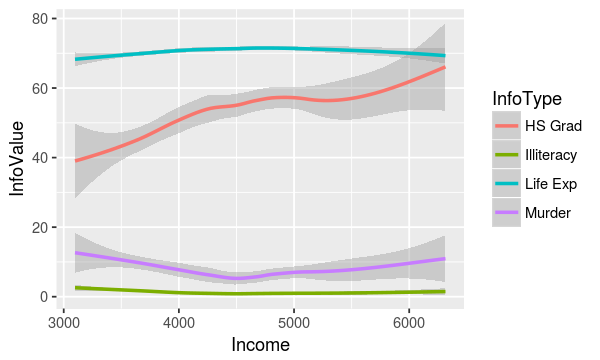

In [56]:
state_info %>% 
  gather(Illiteracy:`HS Grad`, key='InfoType',
         value='InfoValue')%>%
  ggplot + 
   geom_smooth(aes(x=Income, y=InfoValue,color=InfoType))

`geom_smooth()` using method = 'gam'
Warning message:
“Removed 876 rows containing non-finite values (stat_smooth).”

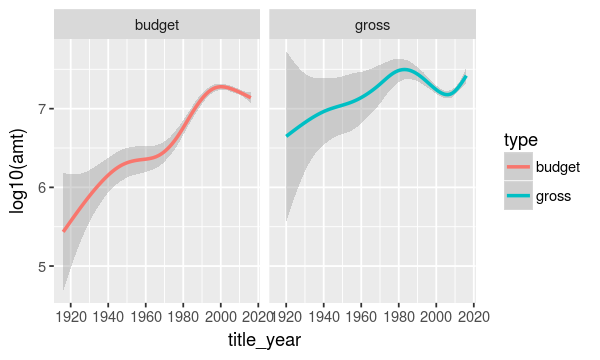

In [63]:
movies %>% filter(country=="USA") %>% 
     select(title_year, budget, gross)  %>% 
    gather(budget,gross, key = 'type', value='amt') %>% 
      ggplot + geom_smooth(aes(x=title_year,y=log10(amt), 
                               group=type, color=type)) +
      facet_wrap(~type)

`geom_smooth()` using method = 'gam'
Warning message:
“Removed 664 rows containing non-finite values (stat_smooth).”

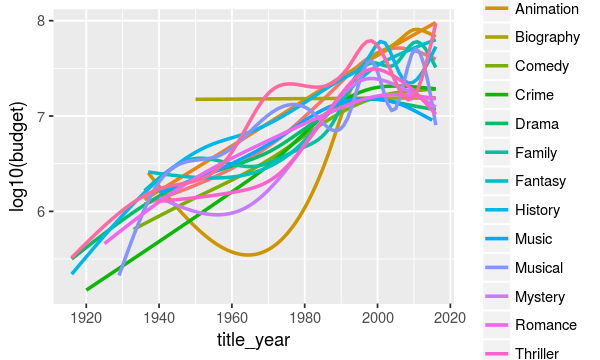

In [64]:
movies %>% filter(country=="USA") %>% 
    select(title_year, budget, Action:Musical)  %>% 
    gather(Action:Musical, key = 'type', value='amt') %>% 
    filter(amt==TRUE) %>%  
      ggplot + geom_smooth(aes(x=title_year,y=log10(budget), 
                               group=type, color=type),se=F)

`spread()` does the opposite
+ turns a tall  data.frame into a wide one

Wide data is useful for e.g. `lm`

In [65]:
spread(state_tall, key = InfoType, value=InfoValue)

Population,Income,Frost,Area,HS Grad,Illiteracy,Life Exp,Murder
365,6315,152,566432,66.7,1.5,69.31,11.3
376,4566,173,97203,62.9,0.6,70.29,6.9
472,3907,168,9267,57.1,0.6,71.64,5.5
579,4809,103,1982,54.6,0.9,70.06,6.2
590,5149,188,109889,65.2,0.5,69.03,11.5
637,5087,186,69273,50.3,0.8,72.78,1.4
681,4167,172,75955,53.3,0.5,72.08,1.7
746,4347,155,145587,59.2,0.6,70.56,5.0
812,4281,174,9027,57.6,0.7,71.23,3.3
813,4119,126,82677,59.5,0.6,71.87,5.3


In [66]:
stdnt <- tibble(
  name      = rep(c("Alice", "Bob"), each=4),
  year      = c(2015, 2015, 2016, 2016, 2015, 2015, 2016, 2016),
  semester  = c("Spring","Fall","Spring","Fall", "Spring","Fall","Spring","Fall"),
  gpa = c(3.2, 3.9, 3.1, 3.6, 3.1, 3.9, 3.3, 3.3)
  )
stdnt

name,year,semester,gpa
Alice,2015,Spring,3.2
Alice,2015,Fall,3.9
Alice,2016,Spring,3.1
Alice,2016,Fall,3.6
Bob,2015,Spring,3.1
Bob,2015,Fall,3.9
Bob,2016,Spring,3.3
Bob,2016,Fall,3.3


In [67]:
stdnt %>% spread(key=semester, value=gpa)

name,year,Fall,Spring
Alice,2015,3.9,3.2
Alice,2016,3.6,3.1
Bob,2015,3.9,3.1
Bob,2016,3.3,3.3


What if there are missing/extra values?

`melt()` and `dcast()` from package `reshape` are slightly more powerful
+ however, `tidyr` with `splyr` should meet all your needs

Another useful pair of functions in `separate()` and `unite()`

In [ ]:
tmp <- movies %>% separate(director_name,c("First","Last"), 
                           sep=" ")

Can control what to do with missing/extra elements:

tmp <- movies %>% separate(director_name,c("First","Last"), sep=" ", extra="merge", fill="left")

Regular expressions will allow more expressivity

`unite()` does the opposite

In [ ]:
tmp <- unite(stdnt, yr_sm, year, semester)

In [ ]:
spread(tmp, key=yr_sm, value=gpa)